In [2]:
import io
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import tensorflow_datasets as tfds
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [108]:
num_words = 2000
maxlen = 20
training_size=20000
embedding_dim = 16
oov_token = "<OOV>"
truncating = "post"
padding = "post"

In [109]:
url = "https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sarcasm.json"
df = pd.read_json(url)

In [110]:
sentences = np.array(df['headline'])
labels = np.array(df['is_sarcastic'])

In [111]:
training_sentences = sentences[0:training_size]
testing_sentences = sentences[training_size:]

In [112]:
training_labels = labels[0:training_size]
testing_labels = labels[training_size:]

In [113]:
tokenizer = Tokenizer(num_words=num_words, oov_token=oov_token)
tokenizer.fit_on_texts(training_sentences)

In [114]:
word_index = tokenizer.word_index

In [115]:
training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, maxlen=maxlen, truncating=truncating, padding=padding)

In [116]:
testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=maxlen, truncating=truncating, padding=padding)

In [117]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(num_words, embedding_dim, input_length=maxlen),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [118]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_8 (Embedding)      (None, 20, 16)            32000     
_________________________________________________________________
global_average_pooling1d_8 ( (None, 16)                0         
_________________________________________________________________
dense_16 (Dense)             (None, 24)                408       
_________________________________________________________________
dense_17 (Dense)             (None, 1)                 25        
Total params: 32,433
Trainable params: 32,433
Non-trainable params: 0
_________________________________________________________________


In [119]:
num_epochs = 30
history = model.fit(training_padded, training_labels, epochs=num_epochs, validation_data=(testing_padded, testing_labels), verbose=2)

Train on 20000 samples, validate on 6709 samples
Epoch 1/30
20000/20000 - 4s - loss: 0.5199 - accuracy: 0.7390 - val_loss: 0.3935 - val_accuracy: 0.8220
Epoch 2/30
20000/20000 - 2s - loss: 0.3438 - accuracy: 0.8504 - val_loss: 0.3693 - val_accuracy: 0.8319
Epoch 3/30
20000/20000 - 2s - loss: 0.3163 - accuracy: 0.8620 - val_loss: 0.3722 - val_accuracy: 0.8304
Epoch 4/30
20000/20000 - 2s - loss: 0.3041 - accuracy: 0.8668 - val_loss: 0.3788 - val_accuracy: 0.8267
Epoch 5/30
20000/20000 - 2s - loss: 0.2990 - accuracy: 0.8687 - val_loss: 0.3836 - val_accuracy: 0.8259
Epoch 6/30
20000/20000 - 2s - loss: 0.2943 - accuracy: 0.8723 - val_loss: 0.3887 - val_accuracy: 0.8278
Epoch 7/30
20000/20000 - 2s - loss: 0.2925 - accuracy: 0.8734 - val_loss: 0.3901 - val_accuracy: 0.8272
Epoch 8/30
20000/20000 - 2s - loss: 0.2895 - accuracy: 0.8740 - val_loss: 0.3939 - val_accuracy: 0.8274
Epoch 9/30
20000/20000 - 2s - loss: 0.2871 - accuracy: 0.8747 - val_loss: 0.3961 - val_accuracy: 0.8301
Epoch 10/30
200

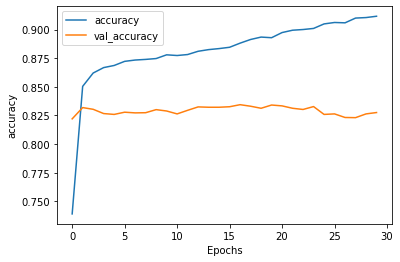

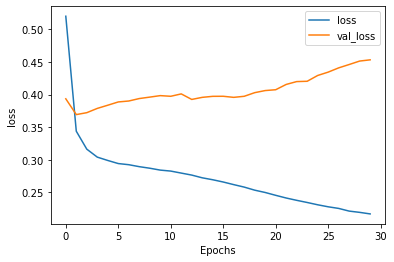

In [120]:
def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()

plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

### Tweak hyperparams so that accuracy is above 90% and the loss function is relatively flat (doesn't have a steep increase). Think of loss as the confidence in prediction.

num_words = 10000
maxlen = 32
training_size=20000
embedding_dim = 16
loss: 0.0088 - accuracy: 0.9969 - val_loss: 1.8266 - val_accuracy: 0.8040

num_words = 1000
maxlen = 32 
loss: 0.3382 - accuracy: 0.8459 - val_loss: 0.4094 - val_accuracy: 0.8119

num_words = 5000 
maxlen = 28
loss: 0.0780 - accuracy: 0.9743 - val_loss: 0.9383 - val_accuracy: 0.8089

num_words = 2000
maxlen = 28
loss: 0.2389 - accuracy: 0.8994 - val_loss: 0.4381 - val_accuracy: 0.8223

num_words = 2000
maxlen = 30
loss: 0.2753 - accuracy: 0.8795 - val_loss: 0.4175 - val_accuracy: 0.8244

num_words = 2000
maxlen = 25
loss: 0.2523 - accuracy: 0.8901 - val_loss: 0.4104 - val_accuracy: 0.8289

num_words = 2000
maxlen = 20
loss: 0.2171 - accuracy: 0.9117 - val_loss: 0.4532 - val_accuracy: 0.8275

### Preparing data for https://projector.tensorflow.org/

In [126]:
reverse_word_index = dict([(val, word) for (word, val) in word_index.items()])

In [127]:
out_v = io.open('week2_sarcasm/vecs.tsv', 'w', encoding='utf-8')
out_m = io.open('week2_sarcasm/meta.tsv', 'w', encoding='utf-8')

for word_num in range(1, num_words):
    word = reverse_word_index[word_num]
    embeddings = weights[word_num]
    out_m.write(word + '\n')
    out_v.write("\t".join([str(x) for x in embeddings]) + "\n")
    
out_m.close()
out_v.close()

FileNotFoundError: [Errno 2] No such file or directory: 'week2_sarcasm/vecs.tsv'